In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
from keras.datasets import mnist
from tensorflow.python.keras import backend as k

Using TensorFlow backend.


In [3]:
#load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

4


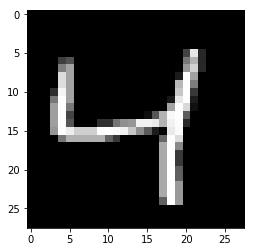

In [5]:
#plt.subplot(221)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
print(y_train[2])

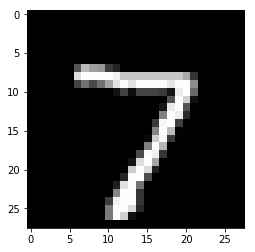

In [6]:
plt.imshow(X_test[0], cmap=plt.get_cmap('gray'))

In [7]:
np.random.seed(125) #for reproducibility

In [8]:
from keras.models import Sequential #simple linear stack of neural network layers
from keras.layers import Conv2D,Dense, Dropout, Activation, Flatten #other core layers from keras
from keras.layers import Convolution2D, MaxPooling2D #CNN layers from keras
from keras.utils import np_utils #utilities that help us transform our data later


In [9]:
print (X_train.shape) #shape of the dataset

(60000, 28, 28)


In [10]:
"""So it appears that we have 60k samples in our training set and the images are
28 pixels x 28 pixels each."""

'So it appears that we have 60k samples in our training set and the images are\n28 pixels x 28 pixels each.'

In [11]:
"""Our MNIST images only have a depth of 1"""

'Our MNIST images only have a depth of 1'

In [12]:
#Preprocess input data for Keras
X_train = X_train.reshape(X_train.shape[0],1,28,28)
print (X_train.shape) #shape of the dataset
X_test = X_test.reshape(X_test.shape[0],1,28,28)
print (X_test.shape) #shape of the dataset

"""the final preprocessing step for the input data is to convert data type to float32
and normalize our data values to the range [0,1]"""

#Convert data type and normalize values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Data normalization is an important step
#Ensures each input parameter has a similar data distribution
#Also, this makes the convergence faster while training the network

X_train /= 255
X_test /=255

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [13]:
len(y_train)

60000

In [ ]:
#Preprocess class labels for Keras
print (y_train.shape)

In [ ]:
"""The y_train and y_test data are not split into 10 distinct
class labels, but rather are represented as a single array with the 
class values"""

In [14]:
#Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

In [15]:
#DEFINE MODEL ARCHITECTURE
model = Sequential() #declare a sequential model format

#CNN input layer
model.add(Convolution2D(32,(3,3),activation='relu', input_shape=(1,28,28),data_format='channels_first'))

#input_shape should be the shape be 1 sample
#in this case, it's (1,28,28) that corresponds to (depth,width,height)
#first 3 parameters correspond to the number of filters to use
#the number of rows in each filter and no of columns in each filter

print (model.output_shape)

(None, 32, 26, 26)


In [16]:
#Next, we simply add more layers to our model 
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #reduce the number of parameters in our model
model.add(Dropout(0.25)) #for regularizing our model in order to prevent overfitting

In [ ]:
"""So far we have added two Convolution layers. To complete 
our model architecture, let's add a fully connected layer and then the output layer"""

In [ ]:
#Fully connected Dense layers

In [17]:
model.add(Flatten()) #layers must be flattened before passing them to fully connected dense layer
model.add(Dense(128,activation='relu')) #first parameter is the output size of the layer
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [18]:
"""Now all we just need to compile the model and we'll be ready to train it. When we 
compile the model, we declare the loss function and the optimizer"""

"Now all we just need to compile the model and we'll be ready to train it. When we \ncompile the model, we declare the loss function and the optimizer"

In [19]:
#Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.fit(X_train,Y_train,batch_size=32,epochs=10,verbose=1)
#Epoch 1/10

Epoch 1/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.2584 - acc: 0.9222
Epoch 2/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.1018 - acc: 0.9704
Epoch 3/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0771 - acc: 0.9771
Epoch 4/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0628 - acc: 0.9803
Epoch 5/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0531 - acc: 0.9841
Epoch 6/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0470 - acc: 0.9856
Epoch 7/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0422 - acc: 0.9869
Epoch 8/10
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0397 - acc: 0.9873 2s -
Epoch 9/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0356 - acc: 0.9886
Epoch 10/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.032

In [21]:
img_show = X_test.reshape(X_test.shape[0],28,28)

In [22]:
y_pred = model.predict_classes(X_test)

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
5
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
9
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
2
9
9
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
9
8
7
2
3
0
2
4
2
4
1
9
5
7
7
2
8
2
6
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
9
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
5
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
3
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
6
6
9
9
5
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
8
9
4
0
6


9
0
9
7
5
4
9
2
0
1
0
5
1
4
9
3
3
6
1
5
2
5
2
2
0
9
2
6
6
0
1
2
0
3
0
2
5
5
7
9
5
5
0
8
9
5
0
3
2
5
9
0
8
8
4
5
8
8
4
5
4
8
5
4
9
2
2
1
2
6
8
8
7
0
3
6
6
4
3
8
8
7
2
2
0
0
9
3
9
9
1
9
8
6
6
4
2
6
9
2
8
5
4
5
7
9
9
9
2
1
8
3
4
0
7
8
3
9
3
4
6
5
6
2
2
9
2
6
0
0
6
1
2
8
7
9
8
2
0
4
7
7
5
0
5
6
4
6
7
4
3
0
7
5
0
7
4
2
0
8
9
9
4
2
4
6
7
8
7
6
9
4
1
3
7
3
0
8
8
7
6
9
3
9
2
2
9
2
1
8
3
2
9
6
8
4
0
1
2
8
4
5
2
7
8
1
1
3
0
3
5
7
0
3
1
9
3
6
3
1
7
7
3
0
8
4
8
2
6
5
2
9
7
3
9
0
9
9
6
4
2
9
7
2
1
1
6
7
4
7
5
9
8
8
2
1
2
4
5
7
6
1
3
2
5
9
9
3
6
1
1
4
6
9
7
2
1
5
1
4
6
3
8
1
1
0
3
1
6
8
4
9
0
7
3
0
2
9
0
6
6
6
3
6
7
7
2
8
6
0
8
3
0
2
9
8
3
2
5
3
8
8
0
0
1
9
5
1
3
9
6
0
1
4
1
7
1
2
3
7
9
7
4
9
9
3
9
2
8
2
7
1
8
0
9
1
0
1
7
7
9
6
9
9
9
2
1
6
1
3
5
7
1
9
7
6
4
5
7
6
6
9
9
6
3
6
2
9
8
1
2
2
5
5
2
3
7
2
1
0
1
0
4
5
2
8
2
8
3
5
1
7
8
1
1
2
9
7
8
4
0
5
0
7
8
8
4
7
7
8
5
8
4
9
8
1
3
8
0
3
1
7
9
5
5
1
6
5
7
4
9
3
5
4
7
1
2
0
8
1
6
0
7
3
9
7
3
9
6
0
8
6
4
8
7
7
9
3
8
6
9
7
2
3
4
0
2
1
8
3
5
5
7
2
4
6
7
2
8
3


1
7
4
7
0
0
6
6
6
3
7
9
2
8
9
8
7
1
9
0
4
8
5
2
3
9
0
1
9
1
5
1
7
6
1
2
1
6
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
0
1
2
3
5
6
7
8
1
0
4
5
6
6
3
4
4
2
8
1
0
6
4
9
7
2
9
2
0
9
3
3
9
1
5
2
3
1
6
7
3
7
8
4
0
2
4
0
2
4
7
8
0
7
0
6
9
3
2
4
8
6
0
5
7
5
1
0
8
1
6
7
2
9
7
9
5
6
5
2
6
2
8
1
7
5
5
7
3
5
0
1
1
3
8
4
9
4
5
1
8
6
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
3
5
3
2
9
3
2
1
4
5
5
2
3
2
1
3
9
7
2
1
2
8
9
1
8
8
7
8
1
0
0
6
7
7
8
7
5
0
6
1
5
7
4
6
1
2
5
0
7
9
9
0
3
4
4
8
4
1
8
6
5
9
0
0
0
3
7
1
6
4
6
0
4
5
4
1
3
8
6
3
9
9
5
9
3
7
8
5
6
4
7
6
2
2
0
9
4
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
6
4
2
6
4
7
5
5
4
7
2
9
3
9
3
8
2
0
9
5
6
0
1
0
6
5
3
5
3
8
0
0
3
4
1
5
3
0
8
3
0
6
2
7
8
1
7
1
3
8
5
4
2
0
9
7
6
7
4
1
6
2
6
7
1
9
8
0
6
9
4
9
9
6
2
3
7
1
9
2
2
5
3
7
8
0
1
2
3
4
7
8
9
0
1
2
3
4
7
8
9
0
1
7
8
9
8
9
2
6
1
3
5
4
8
2
6
4
3
4
5
9
2
0
3
9
4
9
7
3
8
7
4
4
9
8
5
8
2
6
6
2
3
1
3
2
7
3
1
9
0
1
1
3
5
0
7
8
1
5
1
4
6
0
0
4
9
1
6
6
9
0
7
6
1
1
0
1
2
3
4


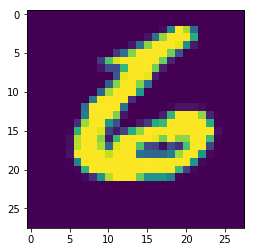

In [23]:
for i in range(len(X_test)):
    print(y_pred[i])

In [30]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 1.03%
